In [80]:
import os
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime
import scipy as sp
import scipy.optimize as op
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
%matplotlib inline

In [81]:
def set_ticks(ax, xMin, yMin, ax2, y2Min):

    # first axis
    ax.tick_params(which='major', right=False, width=1.0, length=8, direction="in", labelsize=12)
    ax.tick_params(which='minor', right=False, width=1.0, length=4, direction="in", labelsize=12)
    ax.xaxis.set_minor_locator(AutoMinorLocator(xMin))
    ax.yaxis.set_minor_locator(AutoMinorLocator(yMin))

    # second axis
    ax2.tick_params(which='major', right=True, width=1.0, length=8, direction="in", labelsize=12, color='firebrick')
    ax2.tick_params(which='minor', right=True, width=1.0, length=4, direction="in", labelsize=12)
    ax2.yaxis.set_minor_locator(AutoMinorLocator(y2Min))   

In [82]:
def pdf(t, a_m, r, tau_p, tau_m, b):
    a_p = r * a_m
    exp_p = a_p * np.exp(-t/tau_p)
    exp_m = a_m * np.exp(-t/tau_m)
    return exp_p + exp_m + b 


def inv_cdf(u, tau):
    t = - tau*(np.log(1-x))
    return t

In [83]:
# constants 
tau_p = 2.1969811 # us (mu+)
tau_m = 0.8546    # us (mu-)

a_m = 0.5 * 3600 * 24 * 7 # decays in one week (assuming 0.5 Hz)
b = 6 * tau_p             # baseline starting point at 6*tau
r = 1.3                   # ratio between mu+/mu-

In [97]:
def generate_spectrum(dist,limits,N):
    
    # extremes in x direction 
    u1 = limits[0] # minimum of x sampling 
    u2 = limits[1] # maximum of x sampling 

    u = np.random.uniform(u1,u2,5*N)

    lower = 0                                       # accept-reject minimum for each point
    upper = np.max(pdf(u, a_m, r, tau_p, tau_m, b)) # accept-reject maximum for each point 

    v = np.random.uniform(lower, upper, 5*N)

    # accepted points 
    points = u[v < pdf(u, a_m, r, tau_p, tau_m, b)]
    # compute acceptance ratio 
    efficiency = len(points) / (5*N)

    # keep only N events if we have more 
    if len(points) >= N:
        points = points[:N]
    else:
        print('The wanted number of events is %1.0f'% N )
        print('The number of generated events is %1.0f' % len(points))

    return points, efficiency 

In [114]:
samples, eff = generate_spectrum(pdf,(0.,7*tau_p),int(a_m))

print('\nEfficiency: {:1.0f} %'.format(eff*100))

The wanted number of events is 302400
The number of generated events is 158540

Efficiency: 10 %


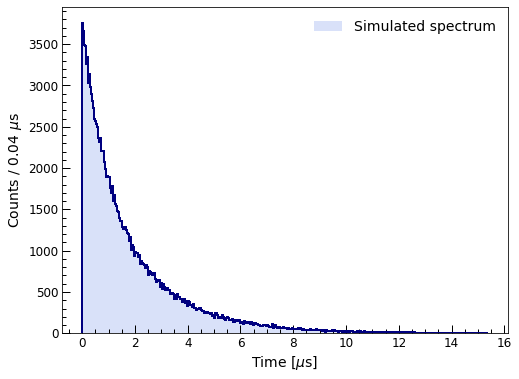

In [116]:
fig, ax = plt.subplots(figsize=(8,6))
n, bins, _ = ax.hist(samples, fc='royalblue', alpha=0.2, label='Simulated spectrum', bins=400)
ax.hist(samples, histtype='step', ec='navy', lw=2, bins=400)

bin_width = bins[1] - bins[0]

# ticks
ax.tick_params(which='major', right=False, width=1.0, length=8, direction='in', labelsize=12)
ax.tick_params(which='minor', right=False, width=1.0, length=4, direction='in', labelsize=12)
ax.xaxis.set_minor_locator(AutoMinorLocator(0.1))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.25))
ax.minorticks_on()

# labels
ax.set_xlabel('Time [$\mu$s]', fontsize=14)
ax.set_ylabel('Counts / %1.2f $\mu$s' % bin_width, fontsize=14)

# legend
ax.legend(loc=0, frameon=False, fontsize=14)

plt.show()